# INFO-F-422 -  Statistical Foundations of Machine Learning 

### MATAGNE Miro-Manuel - __[Miro-Manuel.Matagne@ulb.be](mailto:Miro-Manuel.Matagne@ulb.be) - Student ID 459668__
### Student 2 - __[student2@vub.ac.be](mailto:student2@ulb.ac.be) - Student ID 789012__
### Student 3 - __[student3@ulb.ac.be](mailto:student3@ulb.ac.be) - Student ID 345678__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


## Read the datasets

The training datasets are imported (*training* here means that this data will not be used for the final assessment of the solution quality by DrivenData).

Notice that the characters are read as factors in order to be able to study the categorical variables later on.

In [43]:
X <- read.csv("training_set_values.csv",stringsAsFactors = T)
Y <- read.csv("training_set_labels.csv",stringsAsFactors = T)

In [44]:
eval_data <- read.csv("test_set_values.csv",stringsAsFactors = T)

## Data exploration

For both these datasets, the dimensions, the head and the summary are displayed in order to get a first feel of the data.

In [3]:
dim(X)
head(X)
summary(X)

[1] 59400    40

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


       id          amount_tsh          date_recorded  
 Min.   :    0   Min.   :     0.0   2011-03-15:  572  
 1st Qu.:18520   1st Qu.:     0.0   2011-03-17:  558  
 Median :37062   Median :     0.0   2013-02-03:  546  
 Mean   :37115   Mean   :   317.7   2011-03-14:  520  
 3rd Qu.:55657   3rd Qu.:    20.0   2011-03-16:  513  
 Max.   :74247   Max.   :350000.0   2011-03-18:  497  
                                    (Other)   :56194  
                    funder        gps_height          installer    
 Government Of Tanzania: 9084   Min.   : -90.0   DWE       :17402  
                       : 3635   1st Qu.:   0.0             : 3655  
 Danida                : 3114   Median : 369.0   Government: 1825  
 Hesawa                : 2202   Mean   : 668.3   RWE       : 1206  
 Rwssp                 : 1374   3rd Qu.:1319.2   Commu     : 1060  
 World Bank            : 1349   Max.   :2770.0   DANIDA    : 1050  
 (Other)               :38642                    (Other)   :33202  
   longitude    

In [4]:
dim(Y)
head(Y)
summary(Y)

[1] 59400     2

,id,status_group
,<int>,<fct>
1,69572,functional
2,8776,functional
3,34310,functional
4,67743,non functional
5,19728,functional
6,9944,functional


       id                         status_group  
 Min.   :    0   functional             :32259  
 1st Qu.:18520   functional needs repair: 4317  
 Median :37062   non functional         :22824  
 Mean   :37115                                  
 3rd Qu.:55657                                  
 Max.   :74247                                  

This histogram shows that there are large differences in terms of numbers of samples corresponding to each class. In particular, we see that there are very few samples falling in the category $functional needs repair$, which might be a problem because a model will have a lot of trouble predicting this class since the number of corresponding training samples is very low.

[1] Functional : 32259

[1] Functional needs repair : 4317

[1] Non functional : 22824

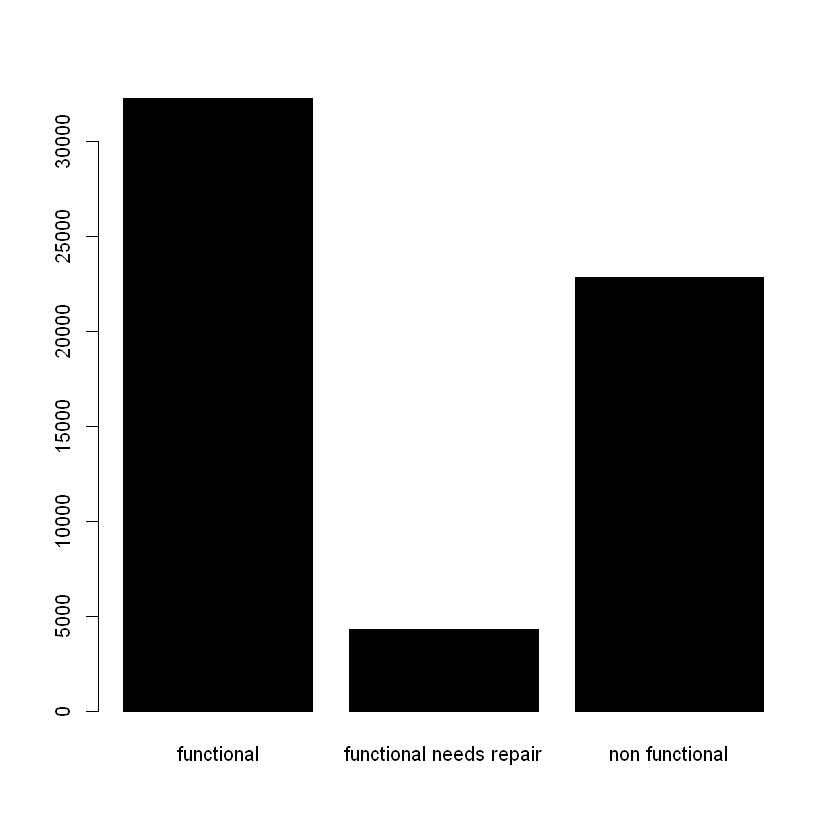

In [5]:
noquote(paste("Functional :",sum(Y$status_group=="functional")))
noquote(paste("Functional needs repair :",sum(Y$status_group=="functional needs repair")))
noquote(paste("Non functional :",sum(Y$status_group=="non functional")))

barplot(table(Y))

# Data preprocessing

## Missing value imputation


We check if there are any missing values in the dataset. The results show that no empty values are present in either dataset.

In [6]:
sum(is.na(X))
sum(is.na(Y))

[1] 0

[1] 0

It is however important to note that this result does not look for empty strings in the categorical variables. Indeed, we saw previously in the summaries of the datasets that there were wome empty strings, for example for features $funder$, $installer$, $subvillage$, $scheme\_management$,...

It is also important to check that all entries in X have a corresponding entry in Y. To do so, we merge the 2 datasets X and Y based on their common feature $id$ and check the dimension of the resulting dataset. As expected, the merged dataset has 59400 entries and 41 features, which means that for all samples in X there exists a corresponding sample in Y.

In [45]:
data <- merge(X,Y)
dim(data)
head(data)

[1] 59400    41

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


## Handle categorical variables

All the categorical variables present in the merged dataset are presented below.

In [46]:
categorical_variables <- which(sapply(data[1,],class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"
[31] "status_group"

### Useless features

A check is made to ensure all categorical variables take more than 1 possible value, otherwise they are not necessary since they do not bring any information. The following code shows that the feature $recorded\_by$ contains only 1 factor, which is $GeoData Consultants Ltd$.

In [47]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l < 2) {
        print(n)
        print(data[1,n])
    }
}

[1] "recorded_by"
[1] GeoData Consultants Ltd
Levels: GeoData Consultants Ltd


In [49]:
remove_useless_features <- function(df) {
    df <- subset(df,select=-c(recorded_by))
    return(df)
}

In [11]:
dim(data)

[1] 59400    41

### Convert the dates

The feature $date\_recorded$ is a categorical variable but can easily be converted into a numerical one.

In [50]:
convert_date_to_numeric <- function(df) {
    df$date_recorded <- as.numeric(as.Date(df$date_recorded))
    return(df)
}

In [200]:
head(data)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


### Handle the coordinates

The dataset contains $longitude$ and $latitude$ features which can be useful in the sense that the outcome of the prediction might depend on if the water pumps are located in a similar region.

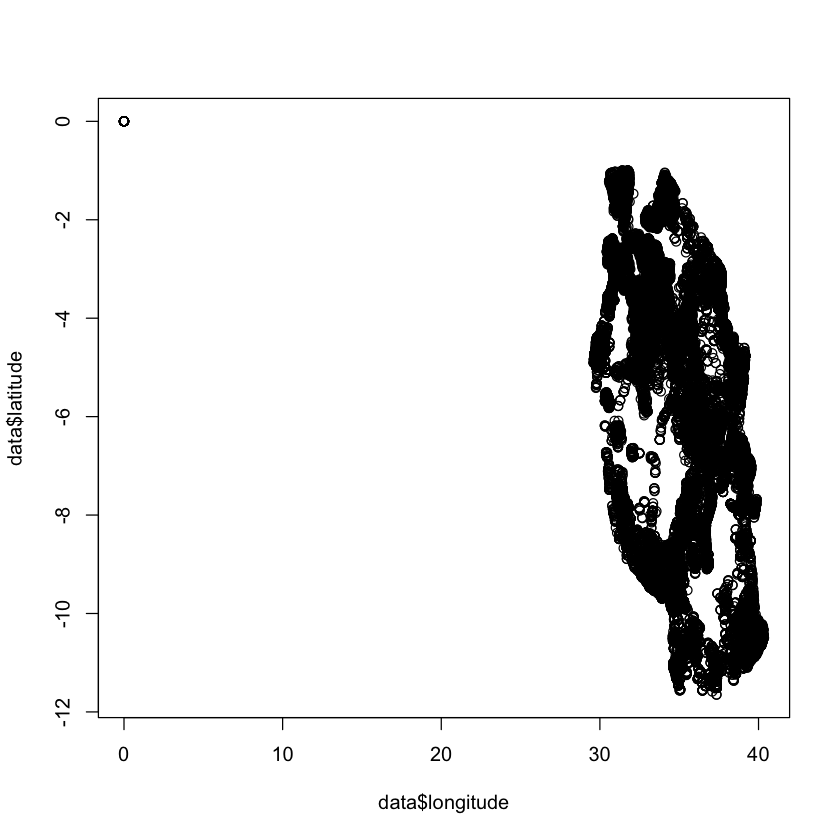

In [67]:
plot(data$longitude,data$latitude)

There seems to be some outliers having coordinates (0,0), which we will remove since they represent null values :

In [51]:
discard_unrealistic_coordinates <- function(df) {
    df <- df[df$longitude > 20 & df$latitude <0,]
    return(df)
}

In [202]:
dim(data)

[1] 59400    41

The new longitudes and latitudes, after filtering, are represented below :

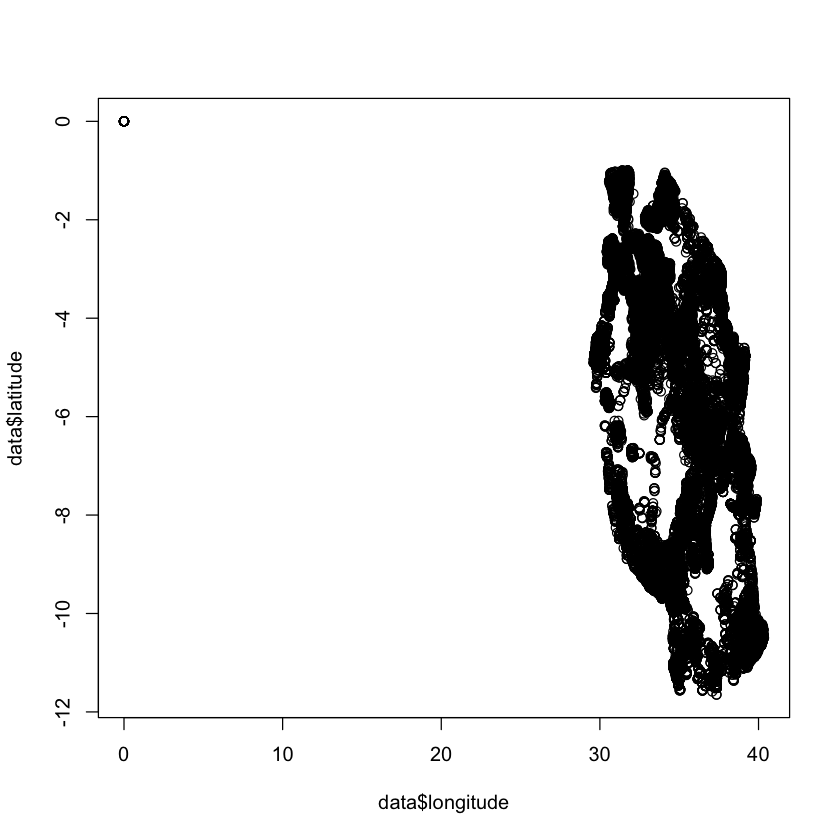

In [70]:
plot(data$longitude,data$latitude)

In [45]:
install.packages("factoextra")


also installing the dependencies ‘rematch’, ‘cellranger’, ‘readxl’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘carData’, ‘pbkrtest’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘flashClust’, ‘leaps’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’





The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpnmnZYn/downloaded_packages


In [52]:
library(factoextra)

Although there is already an attribute $region\_code$ in the dataset, we might use these coordinates to our advantage by defining a custom notion of spaciality between the water pumps. Using k-means clustering, we can separate the pumps into k different geographical regions based on $longitude$ and $latitude$. The advangate of this method compared to the $region\_code$ feature is that we can choose how small or large the different regions are.

In [53]:
generate_regions <- function(df) {
    coordinates <- as.data.frame(cbind(df$longitude,df$latitude))
    km_res <- kmeans(coordinates,20)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- km_res$cluster
    write.csv(km_res$centers,"cluster_centers.csv")
    return(df)
}
#head(km.res$cluster,20)

In [19]:
data <- generate_regions(data)

In [54]:
closest_cluster <- function(x) {
    centers <- read.csv("cluster_centers.csv")
    centers <- centers[,c("V1","V2")]
    #print(centers)
    #print(paste("x:",x))
    cluster_dist <- apply(centers, 1, function(y) sqrt(sum((x-y)^2)))
    return(which.min(cluster_dist)[1])
}

In [55]:
set_existing_regions <- function(df) {
    clusters2 <- apply(df[,c("longitude","latitude")], 1, closest_cluster)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- clusters2
    return(df)
}

In [56]:
eval_data <- set_existing_regions(eval_data)

In [57]:
options(repr.matrix.max.cols=50)
head(eval_data,20)
head(data,20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,region_kmeans
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,50785,0,2013-02-04,Dmdd,1996,DMDD,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,3
2,51630,0,2013-02-04,Government Of Tanzania,1569,DWE,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,20
3,17168,0,2013-02-01,,1567,,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,17
4,45559,0,2013-01-22,Finn Water,267,FINN WATER,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,,GeoData Consultants Ltd,VWC,,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,12
5,49871,500,2013-03-27,Bruder,1260,BRUDER,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,16
6,52449,0,2013-03-04,Government Of Tanzania,1685,DWE,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,GeoData Consultants Ltd,VWC,Timbolo sambasha TPRI pipe line,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,20
7,24806,0,2011-03-02,Government Of Tanzania,550,Gover,none,0,Rufiji,Kichangani,Iringa,11,7,Kilolo,Mahenge,600,True,GeoData Consultants Ltd,VWC,,True,2007,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,9
8,28965,0,2013-01-25,Finw,234,FinW,Kwa Mkwaa,0,Ruvuma / Southern Coast,Ilala,Mtwara,9,4,Tandahimba,Maundo,1,True,GeoData Consultants Ltd,Water Board,Borehole,True,1982,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,12
9,36301,30,2013-01-23,Unicef,584,LGA,Kwa Mzee Mpini,0,Ruvuma / Southern Coast,Bondeni,Mtwara,90,33,Newala,Mnekachi,40,True,GeoData Consultants Ltd,VWC,MWS,False,1997,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,12


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.11815407,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.39564152,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.27926803,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.18755455,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.09928949,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.97240273,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
7,6,0,2012-10-20,Government Of Tanzania,0,Government,33.22988,-3.85298271,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
8,7,0,2011-03-23,Water,0,Gover,36.31362,-6.71925716,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
9,8,0,2011-04-07,Water,0,Commu,35.93944,-6.01435820,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


The graphical representation of the regions after the k-means clustering is shown below.

In [24]:
fviz_cluster(km.res,coordinates)

ERROR: Error in fviz_cluster(km.res, coordinates): objet 'km.res' introuvable


Therefore, we can now remove the longitude and latitude features from the dataset and replace them with a new feature called $region$, representing the cluster in which the pump is located.

In [76]:
options(repr.matrix.max.cols=50)
head(data)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


### Variables with too many levels

Some categorical variables that have too many levels could be useless for the problem. Indeed, let us imagine if each sample has a different factor for a given feature, this would not bring any additional information. This is why we check what features have a huge amount of features below :

In [58]:
categorical_variables <- which(sapply(data[1,],class)=="factor")

problematic_features <- c()

for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l > 2000) {
        #print(n)
        problematic_features <- c(problematic_features,n)
        #print(data[1,n])
    }
}
problematic_features

[1] "installer"   "wpt_name"    "subvillage"  "ward"        "scheme_name"

In [59]:
backup <- data

In [60]:
dim(backup)

[1] 59400    41

In [61]:
data <- backup

For each one of these features, we check the distribution of the different categories.

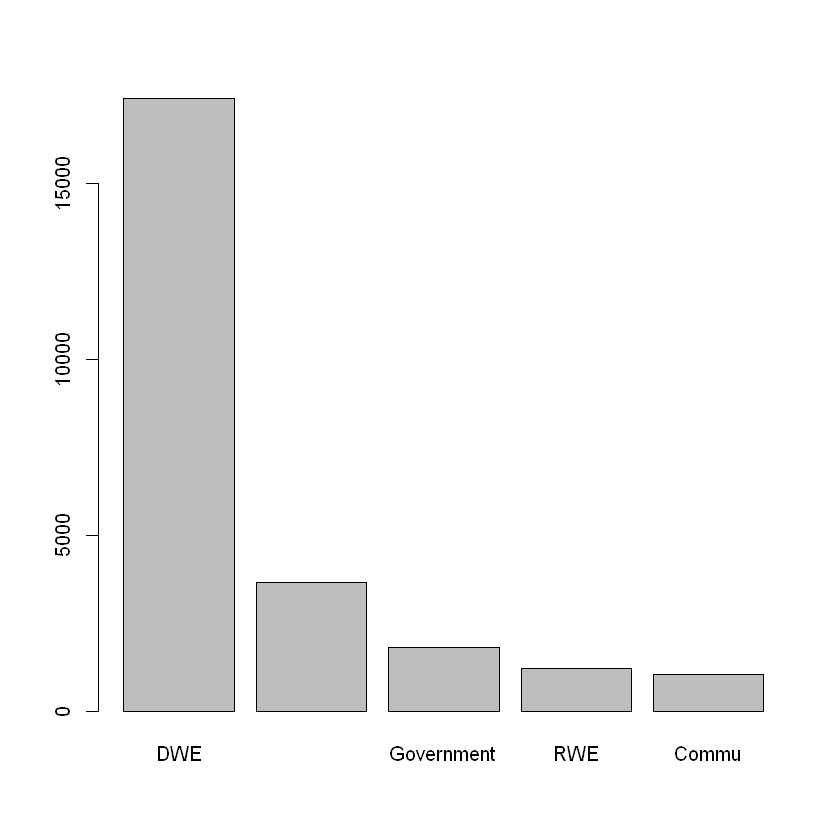

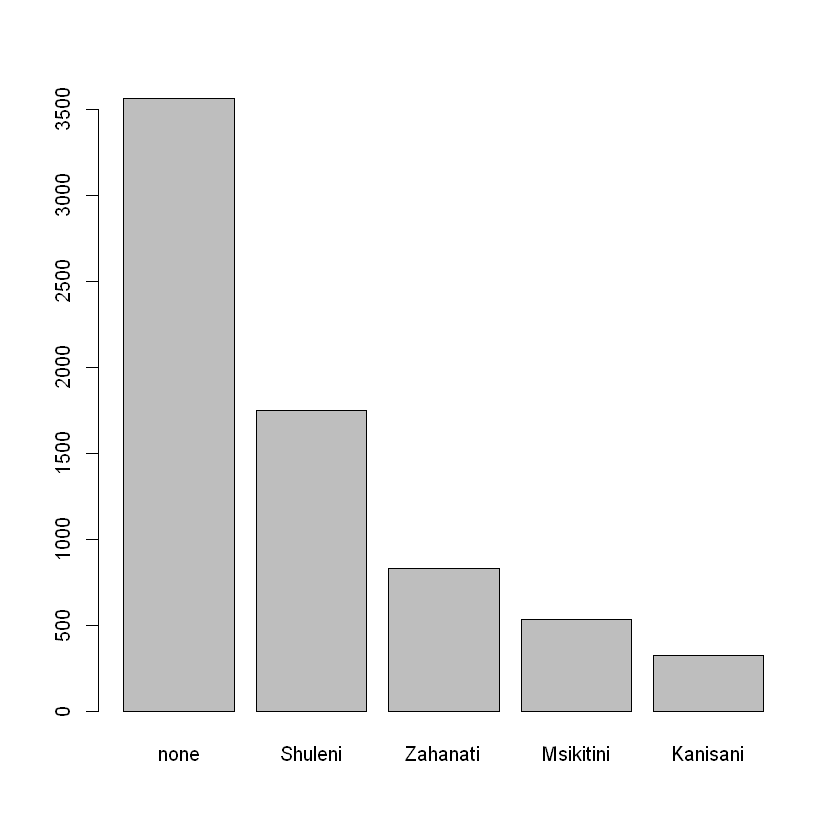

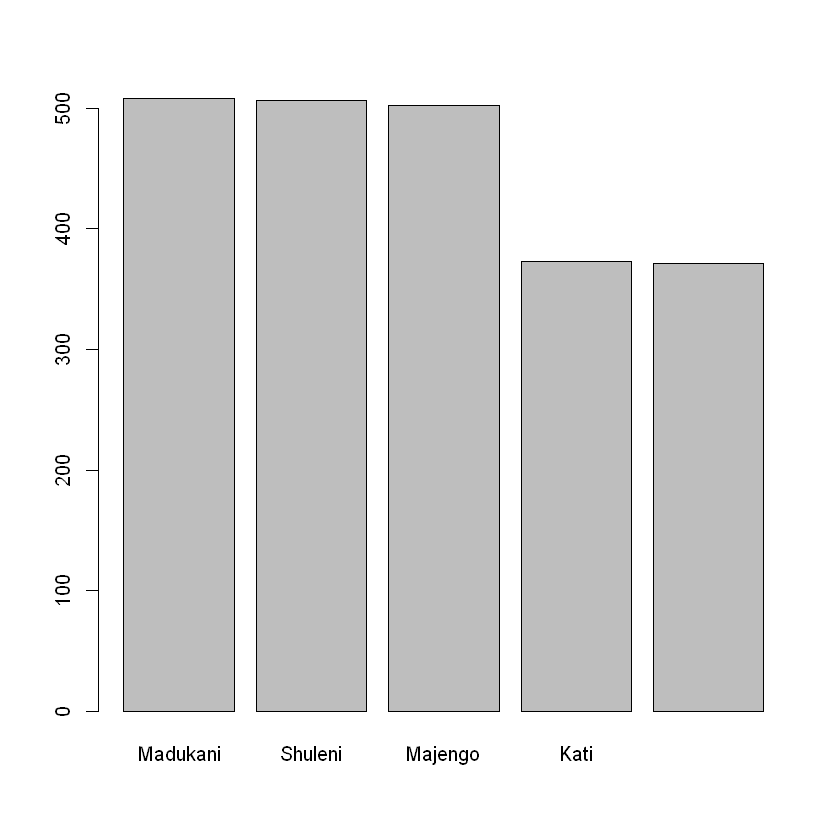

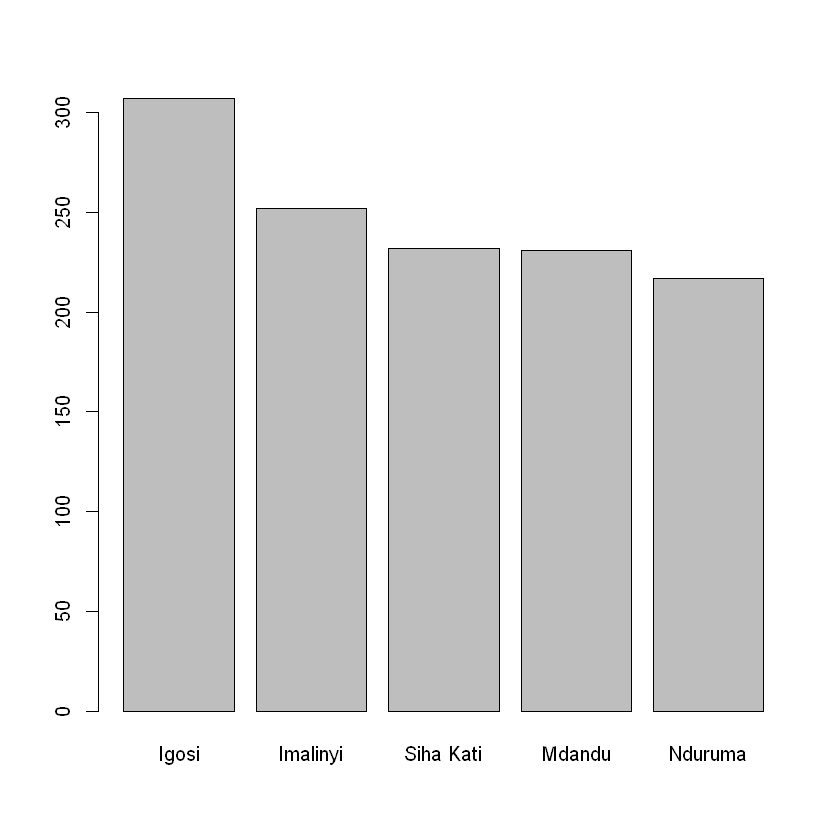

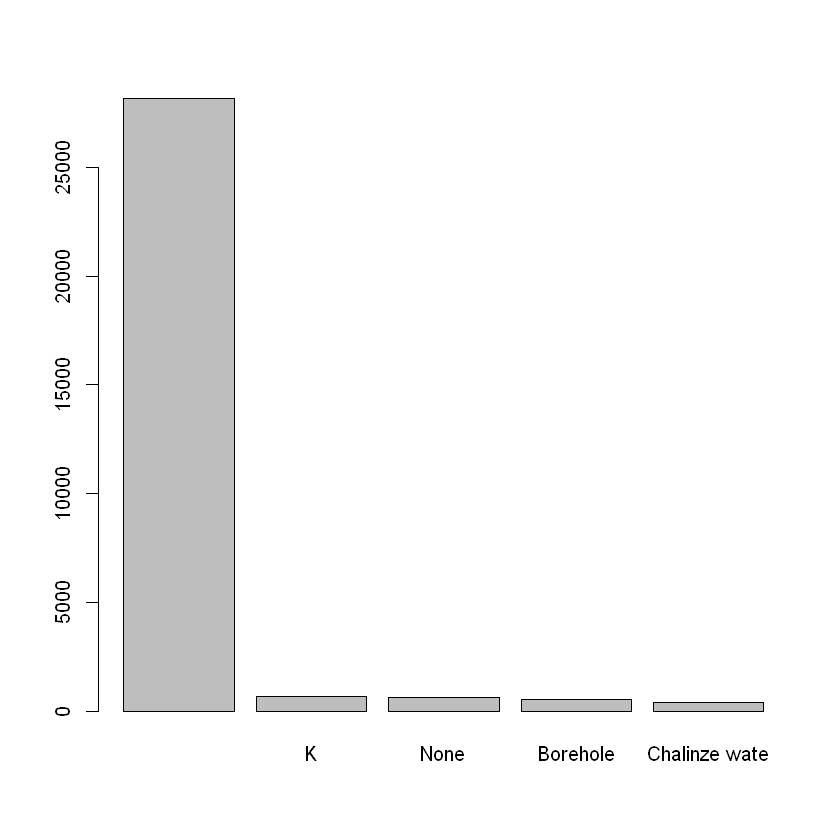

In [62]:
for (f in problematic_features) {
    factors <- table(data[,f])
    barplot( (sort(factors, decreasing=TRUE)[1:5] ))
}

In [63]:
remove_features_many_levels <- function(df) {
    df <- subset(df,select=-which(names(df) %in% problematic_features))
    return(df)
}

In [64]:
categorical_variables <- which(sapply(subset(data,select=-c(status_group)),class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"

In [ ]:
install.packages('dummies')

In [65]:
library(dummies)

In [66]:
one_hot_encoding_training <- function(df) {
    categorical_variables <- which(sapply(subset(df,select=-c(status_group)),class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

In [68]:
one_hot_encoding_test <- function(df) {
    categorical_variables <- which(sapply(df,class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

In [47]:
#options(repr.matrix.max.cols=500)
#head(dum)

In [69]:
head(data[,-categorical_variables])

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,0,0,33.12583,-5.118154,0,14,3,0,0,non functional
2,1,0,1978,34.77072,-9.395642,0,11,4,20,2008,functional
3,2,0,0,36.11506,-6.279268,0,1,4,0,0,functional
4,3,10,1639,37.14743,-3.187555,0,3,5,25,1999,functional
5,4,0,0,36.16489,-6.099289,0,1,4,0,0,non functional
6,5,50,28,39.28612,-6.972403,0,60,43,6922,0,functional


In [36]:
data <- cbind(data[,-categorical_variables],dum)
dim(data)
head(data)

ERROR: Error in data.frame(..., check.names = FALSE): objet 'dum' introuvable


In [70]:
preprocess_training <- function(df) {
    df <- remove_useless_features(df)
    df <- convert_date_to_numeric(df)
    df <- discard_unrealistic_coordinates(df)
    df <- generate_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_training(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    write(colnames(subset(df,select=-c(status_group))),"features.txt")
    df_no_status <- subset(df,select=-c(status_group))
    df_ordered <- df_no_status[,order(names(df_no_status))]
    #print(head(df_ordered))
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    return(df)
}

In [71]:
preprocess_test <- function(df) {
    df <- remove_useless_features(df)
    df <- convert_date_to_numeric(df)
    #df <- discard_unrealistic_coordinates(df)
    df <- set_existing_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_test(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    features_list <- scan("features.txt",what = " ")
    column_names <- colnames(df)
    #Removing all columns that did not appear in training
    cols_to_remove <- c()
    for(c in 1:ncol(df)) {
        if(!(column_names[c] %in% features_list)) {
            #print(column_names[c])
            cols_to_remove <- c(cols_to_remove,c)
        }
    }
    df <- df[,-cols_to_remove]
    
    #Adding empty columns for missing features
    test_columns <- colnames(df)
    for(c in 1:length(features_list)) {
        if(!(features_list[c] %in% test_columns)) {
            #print(features_list[c])
            df[,features_list[c]] = 0
        }
    }
    df <- df[,order(names(df))]
    return(df)
}

In [72]:
data_preproc <- preprocess_training(data)
save(data_preproc, file = "data_preproc.Rdata")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts ar

In [73]:
head(data_preproc)


,amount_tsh,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_/_Southern_Coast,basin_Wami_/_Ruvu,construction_year,date_recorded,district_code,extraction_type_afridev,extraction_type_cemo,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope_pump,extraction_type_class_submersible,extraction_type_class_wind-powered,extraction_type_climax,extraction_type_gravity,extraction_type_group_afridev,...,source_type_shallow_well,source_type_spring,source_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride_abandoned,water_quality_milky,water_quality_salty,water_quality_salty_abandoned,water_quality_soft,water_quality_unknown,waterpoint_type_cattle_trough,waterpoint_type_communal_standpipe,waterpoint_type_communal_standpipe_multiple,waterpoint_type_dam,waterpoint_type_group_cattle_trough,waterpoint_type_group_communal_standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand_pump,waterpoint_type_group_improved_spring,waterpoint_type_group_other,waterpoint_type_hand_pump,waterpoint_type_improved_spring,waterpoint_type_other,status_group
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,0,0,0,1,0,0,0,0,0,0,15657,3,1,0,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,non functional
2,0,0,0,0,0,0,0,1,0,0,2008,15038,4,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,functional
3,0,0,0,0,0,0,0,0,0,1,0,15060,4,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,functional
4,10,0,0,0,0,0,1,0,0,0,1999,15859,5,0,0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,functional
5,0,0,0,0,0,0,0,0,0,1,0,15055,4,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,non functional
6,50,0,0,0,0,0,0,0,0,1,0,15031,43,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,functional


In [74]:
test_preproc <- preprocess_test(eval_data)
save(data_preproc, file = "test_preproc.Rdata")

ERROR: Error in `[.data.frame`(df, , c("longitude", "latitude")): undefined columns selected


In [75]:
dim(test_preproc)

ERROR: Error in eval(expr, envir, enclos): objet 'test_preproc' introuvable


In [216]:
train_cols <- colnames(data_preproc)
for(c in colnames(test_preproc)) {
    if(!(c %in% train_cols)) {
        print(c)
    }
}

## Feature engineering

## Feature selection

# Model selection

## Model 1


In [76]:
accuracyFromConfusionMatrix <- function(confusion_matrix){
   
    full_confusion_matrix <-matrix(0, nrow = 3, ncol = 3)
    colnames(full_confusion_matrix) <- colnames(confusion_matrix)
    rownames(full_confusion_matrix) <- colnames(confusion_matrix)
    full_confusion_matrix[rownames(confusion_matrix),] <- confusion_matrix[rownames(confusion_matrix),]
    return((full_confusion_matrix[1,1]+full_confusion_matrix[2,2]+full_confusion_matrix[3,3])/sum(full_confusion_matrix))
}


computeResults <- function(Y,Y_hat,explanatory_string="",verbose=TRUE){
 
    confusion_matrix <- table(Y_hat,Y)
    accuracy <- accuracyFromConfusionMatrix(confusion_matrix)
    misclassification_rate <- 1 - accuracy
    
    if(verbose){
        print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
        print(confusion_matrix)
        print(paste("[INFO] - Accuracy",explanatory_string,":",accuracy))
        print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    }
    return(accuracy)
}

In [83]:
library("nnet")
library("randomForest")
library("RSNNS")

#Cross validation
crossValidationInOutSample <- function(parameter,k,model_type){
    data <- data_preproc
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    
    # 2. Split the dataset into k groups
    max <- ceiling(nrow(data)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))

    # 3. For each unique group:
    for (i in 1:k){
        #3.1 Take the group as a hold out or test data set
        train_data <- data[-splits[[i]],]

        #3.2 Take the remaining groups as a training data set
        test_data <- data[splits[[i]],]
        print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))

        #3.3 Fit a model on the training set and evaluate it on the test set
        if(model_type=="nnet"){
              model_single_out <- nnet(status_group ~ ., data=train_data,size=parameter,
                                 skip=FALSE, maxit=100,rang=0.2,MaxNWts=10000,trace=FALSE)
              Y_pred<-predict(model_single_out,test_data[,-target_variable])
              Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
        }
        if(model_type=="random_forest"){
            model_single_out <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=parameter,keep.forest=TRUE)
            Y_hat <- predict(model_single_out,newdata = test_data[,-target_variable])
           # print(Y_hat)
        }
      
        
        Y <- test_data[,target_variable]
       
        #confusion_matrix <- table(Y_hat,Y)
        
        #3.4 Retain the evaluation score and discard the model
       #accuracy_vec[i] = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
        accuracy_vec[i] <- computeResults(Y,Y_hat,paste(i,"fold"),verbose=FALSE)
        #misclassification_rate = 1 - accuracy_vec[i]
        #print(paste("[INFO] - Misclassification rate -",i,"fold:",misclassification_rate))
    }

    # 4.1 Summarize the skill of the model using the sample of model evaluation scores
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    
    # 4.2 Split training-test for in/out of sample predictions
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    Y <- test_data[,target_variable]

    model_single_out <- nnet(status_group ~ ., data=train_data,size=parameter,trace=F,skip=FALSE,maxit=300,rang=0.2,MaxNWts=10000)
    model_single_out

    # 4.2 - In sample evaluation error computation
    Y_pred<-predict(model_single_out,train_data[,-target_variable])
    Y_hat_single_out_in_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]

    # 4.2 - Out of sample evaluation error computation
    Y_pred<-predict(model_single_out,test_data[,-target_variable])
    Y_hat_single_out_out_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]

    accuracy_in_sample <- computeResults(train_data[,target_variable],Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- computeResults(Y,Y_hat_single_out_out_sample,"Out sample")
    
    return(list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample,cv=mean(accuracy_vec)))
}

applyCrossValTest <- function(parameters,k,model_type){
    error_in_sample_vec <- numeric()
    error_out_sample_vec <- numeric()
    error_cv_vec <- numeric()

    for(parameter in parameters){
        print(paste("[INFO] - Testing h=",parameter))
        results <- crossValidationInOutSample(parameter,k,model_type)
        error_in_sample_vec <- c(error_in_sample_vec,results$in_sample)
        error_out_sample_vec <- c(error_out_sample_vec,results$out_sample)
        error_cv_vec <- c(error_cv_vec,results$cv)
    }
}
    

Warning message:
"package 'nnet' was built under R version 4.0.5"
Warning message:
"package 'randomForest' was built under R version 4.0.5"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'RSNNS' was built under R version 4.0.5"
Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.0.5"


In [ ]:
model_type = "random_forest"
k <- 3
parameters <- c(1)

applyCrossValTest(parameter,k,model_type)
save(error_in_sample_vec,error_out_sample_vec,error_cv_vec,file="CV.Rdata")

In [ ]:
load("CV.Rdata")
plot(hidden_nodes_vec,error_in_sample_vec,type="n",main="Classification accuracy as a function of number of hidden neurons",xlab="Hidden neurons",ylab="Accuracy")
lines(hidden_nodes_vec,error_in_sample_vec)
lines(hidden_nodes_vec,error_out_sample_vec,col="blue")
lines(hidden_nodes_vec,error_cv_vec,col="red")
legend("bottomright",legend=c("In sample","Out of sample","CV"),col=c("black","blue","red"),lty=c(1,1,1))

In [ ]:
#install.packages("RSNNS")
library("nnet")
library("randomForest")
library("RSNNS")

BaggingNN <- function(n_bagging_resamples,model_type,hidden_nodes){
    data <- data_preproc
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    set.seed(1717)
    data_idx <- sample(1:nrow(data))
    
    # 2. Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)
    
    # 2. Split shuffled dataset into training and test set
    if (model_type=="nnet"){
         train_data <- data[data_idx[1:half_split],]
         test_data <- data[data_idx[(half_split+1):nrow(data)],]
         n_train <- length(train_data)
         Y_hat_bagged<-array(0,c(length(test_data),1))
         Y <- test_data[,target_variable]
    }
     if (model_type=="radial"){
        train_data <- scaled[data_idx[1:half_split],]
        train_label <- data[data_idx[1:half_split],target_variable]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
        n_train <- dim(train_data)[1]
        Y_hat_bagged<-array(0,c(dim(test_data)[1],1))
        Y <- test_label
    }
 
   
    Y_pred_models<-numeric()
   

    accuracy_vec<-array(0,c(1,n_bagging_resamples))
        print("okkke-1-1")
    for (i in 1:n_bagging_resamples)
    {
      # 1. Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # 2. Fit model
        #model<- 0
       # Y_pred <-  0
        print("okkke11")
      if (model_type == "nnet"){
          print("okkke22")
           model <- nnet (status_group ~ .,train_data[I_bag,],skip=FALSE,
                       size=hidden_nodes, maxit=75,trace=F,rang=0.2,MaxNWts=20000)
           Y_pred <- predict(model,test_data[,-target_variable])
          print("whaaat")
      }
     if (model_type=="radial"){
          model <- RSNNS::rbf(as.matrix(train_data[I_bag,]),
                           decodeClassLabels(as.matrix(train_label[I_bag])), # Training labels must be provided with one-hot-encoding
                           size=hidden_nodes, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)

          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
     }
      

     
    print("okk3333")
      result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
#       result_classification[1] <- "functional needs repair"
#       result_classification[2] <- "non functional"
      Y_pred_models <- cbind(Y_pred_models,result_classification)
      accuracy_vec[i] <- computeResults(Y,result_classification,paste(i,"th model"),verbose=F)
    }


   
#     # 3. Majority vote of the classifiers to make the prediction

     Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))
     #Y <- test_data[,target_variable]

     accuracy_bag <- computeResults(Y,Y_hat_bagged,"bagged model")
     print(accuracy_bag)
     if (model_type == "nnet"){
             print("okk444")
             model_single_out <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=75,rang=0.2,MaxNWts=20000)
     }
     if (model_type == "radial"){
          model_single_out <- model_single_out <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(train_label),
                           #nOutputs=2,
                           size=hidden_nodes, 
                           maxit=150, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
         
     }
     Y_pred_single_out <- predict(model_single_out,test_data[,-target_variable])
     colnames(Y_pred_single_out) <- c("functional", "functional needs repair", "non functional")
     Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred_single_out,ties.method="first")]
     accuracy_single_out <- computeResults(Y,Y_hat_single_out,"single model")
     return(list(accuracy_bagged=accuracy_bag,accuracy_simple=accuracy_single_out,bagging_accuracies=accuracy_vec))
}
print("test")


In [ ]:
load(file = "data_preproc.Rdata")
results <- BaggingNN(n_bagging_resamples=10,"nnet",hidden_nodes=10)

## Model 2


In [235]:
library("randomForest")
n_trees <- c(4,6,8,14)
data <- data_preproc
accuracy_vec <- array(0,length(n_trees))
#data <- data[1:500,c(2,3,41)]
#print(data[0,11])
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
target_variable <- ncol(data)
index <- 1

for (i in n_trees){ #print(i)
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    
    model <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=i,keep.forest=TRUE)
    print(model$test$confusion)
    accuracy_vec[index] = (model$test$confusion[1,1]+model$test$confusion[2,2]+model$test$confusion[3,3])/sum(model$test$confusion)
    index <- index + 1
    
    Y_pred <- predict(model,newdata = test_preproc)
    #print(paste("Y_pred : ",Y_pred))
}

accuracy_vec

#plot(accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate")

                        functional functional needs repair non functional
functional                   14581                      84            945
functional needs repair       1452                     225            270
non functional                3927                      65           7245
                        class.error
functional               0.06591928
functional needs repair  0.88443760
non functional           0.35525496
    [1] "Y_pred :  functional"              "Y_pred :  functional"             
    [3] "Y_pred :  functional"              "Y_pred :  non functional"         
    [5] "Y_pred :  functional"              "Y_pred :  functional"             
    [7] "Y_pred :  functional"              "Y_pred :  non functional"         
    [9] "Y_pred :  non functional"          "Y_pred :  functional"             
   [11] "Y_pred :  functional"              "Y_pred :  non functional"         
   [13] "Y_pred :  non functional"          "Y_pred :  functional"             


[1] 0.7657845

In [236]:
res <- cbind("id"=test_preproc$id,"status_group"=as.character(Y_pred))

In [238]:
write.csv(res,"submission.csv",row.names=FALSE)

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





# Conclusions